In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import mplfinance as mpf
import plotly.graph_objects as go
import yfinance as yf
import cryptocompare
from yahoofinancials import YahooFinancials

In [2]:
# Load Dataset
dataset = pd.read_csv("../dataset/ETH-USD update 08-2024.csv", parse_dates=["Date"])
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2479 non-null   datetime64[ns]
 1   Open       2479 non-null   float64       
 2   High       2479 non-null   float64       
 3   Low        2479 non-null   float64       
 4   Close      2479 non-null   float64       
 5   Adj Close  2479 non-null   float64       
 6   Volume     2479 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 135.7 KB


In [3]:
print(dataset)

           Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
2474 2024-08-18  2614.109619  2684.031006  2596.735107  2613.357178   
2475 2024-08-19  2612.718506  2648.284424  2566.401123  2637.306396   
2476 2024-08-20  2637.306396  2695.913818  2556.747559  2573.106934   
2477 2024-08-21  2573.108887  2662.953369  2538.657715  2631.395508   
2478 2024-08-22  2631.152832  2643.730957  2590.200195  2636.556396   

        Adj Close       Volume  
0      320.884003    893249984  
1      299.252991    885985984  
2      314.681000    842300992  
3      307.9079

c:\Users\Admin\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


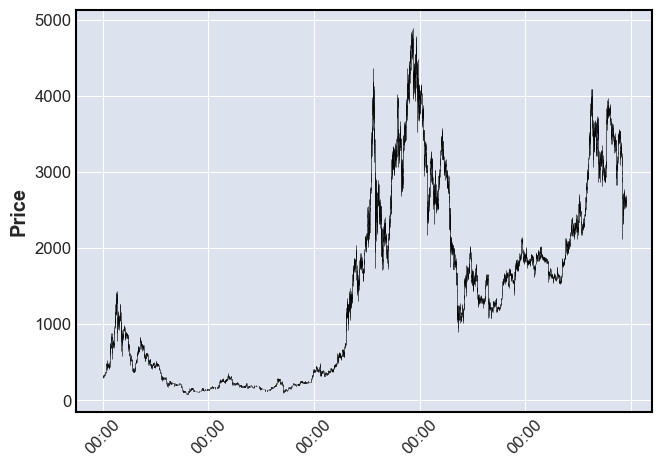

In [4]:
dataset.index = pd.to_datetime(dataset.index)
mpf.plot(dataset,type='candle')

In [5]:
dataset['Date'] = pd.to_datetime(dataset['Date'], unit='s')

fig = go.Figure(data=[go.Candlestick(x=dataset['Date'],
                open=dataset['Open'],
                high=dataset['High'],
                low=dataset['Low'],
                close=dataset['Close'])])

fig.show()

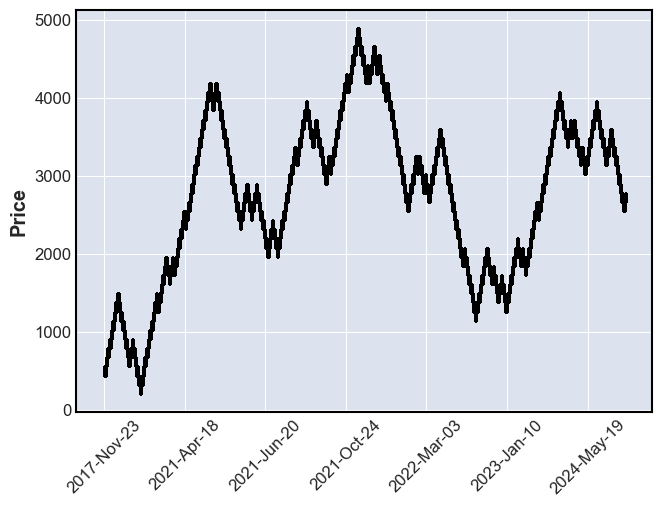

In [6]:
date = pd.read_csv("../dataset/ETH-USD update 08-2024.csv",index_col=0,parse_dates=True)
date.index.name = 'Date'
mpf.plot(date,type='renko')

c:\Users\Admin\anaconda3\Lib\site-packages\mplfinance\_utils.py:129: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\Admin\anaconda3\Lib\site-packages\mplfinance\_utils.py:130: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\Admin\anaconda3\Lib\site-packages\mplfinance\_utils.py:131: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



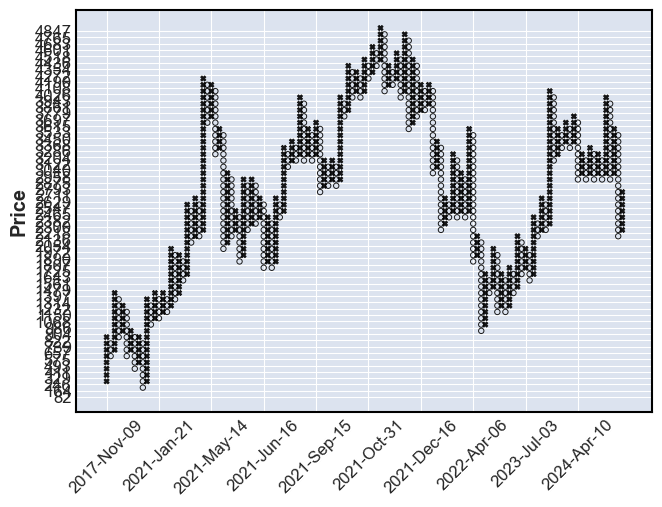

In [7]:
mpf.plot(date,type='pnf')


c:\Users\Admin\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




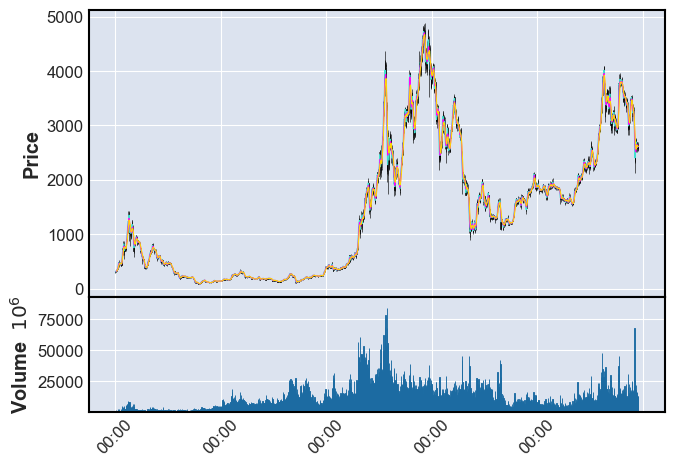

In [8]:
mpf.plot(dataset,type='candle',mav=(3,6,9),volume=True)